In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

#train_data = pd.read_csv("../input/train.csv") #reading the csv files using pandas
#test_data = pd.read_csv("../input/test.csv")

In [4]:
X[0,:].shape

(784,)

9


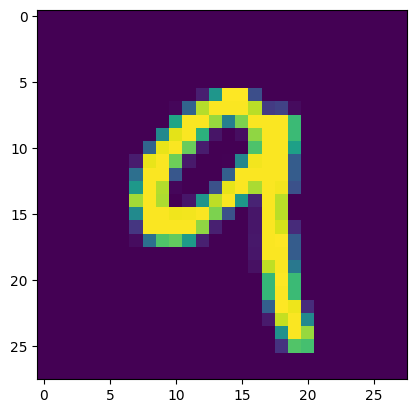

In [5]:
plt.imshow(X[110,:].reshape(28,28))
print(y[110])

In [6]:
np.unique(X[0,:])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=int64)

In [7]:
X = X/255.0

### Q1
whiten the data using function from sklearn.preprocessing
whiten is mean 0 and var 1

In [8]:
# whiten the data 
from sklearn.preprocessing import scale
X_scaled = scale(X)
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(X_scaled.mean())
print(X_scaled.var())

In [9]:
squarer = lambda t: int(t)
vfunc = np.vectorize(squarer)
y = vfunc(y)

In [10]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [11]:
#Fill in
def train_and_test_split(X,y):

    p = np.random.permutation(len(y))
    train = np.floor(len(y) * 0.7).astype('int')
    X_train = X[p[:train], :]
    y_train = y[p[:train]]
    X_test = X[p[train + 1:], :]
    y_test = y[p[train + 1:]]

    return X_train,y_train,X_test,y_test


In [12]:
# #Fill in
def train_and_test_split(X,y):
    tr_index = []
    te_index = []
    for i in range(10):
        prem = np.random.permutation(np.where(y == i)[0])
        p = int(np.round(len(prem)*0.7))
        tr_index.extend(prem[:p])
        te_index.extend(prem[p+1:])
    tr_index = np.random.permutation(tr_index)
    te_index = np.random.permutation(te_index)
    X_train = X[tr_index,:]
    y_train = y[tr_index]
    X_test = X[te_index,:]
    y_test = y[te_index]
    return X_train,y_train,X_test,y_test

In [13]:
X_train,y_train,X_test,y_test = train_and_test_split(X,y)

2


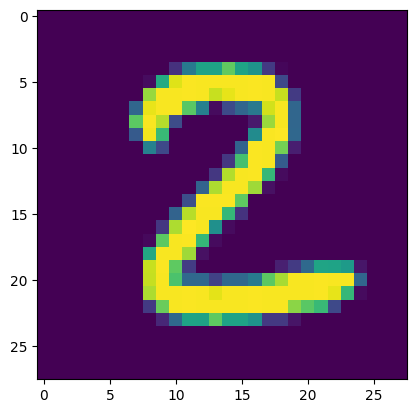

In [14]:
plt.imshow(X_train[0,:].reshape(28,28))
print(y_train[0])

In [15]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred = model_linear.predict(X_test)

5 5


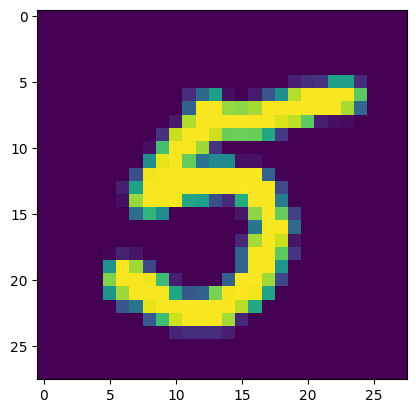

In [17]:
plt.imshow(X_test[10,:].reshape(28,28))
print(y_test[10],y_pred[10])

In [18]:
np.count_nonzero(y_pred!=y_test)

1370

### Q2
use sklearn.metrics to get accuracy score and confusion matrix 

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [20]:
# Print the true label and predicted label for the example image
print("True label:", y_test[10])
print("Predicted label:", y_pred[10])

# Calculate the number of incorrect predictions
num_incorrect = np.count_nonzero(y_pred != y_test)
print("Number of incorrect predictions:", num_incorrect)

True label: 5
Predicted label: 5
Number of incorrect predictions: 1370


Accuracy: 0.934727714517128


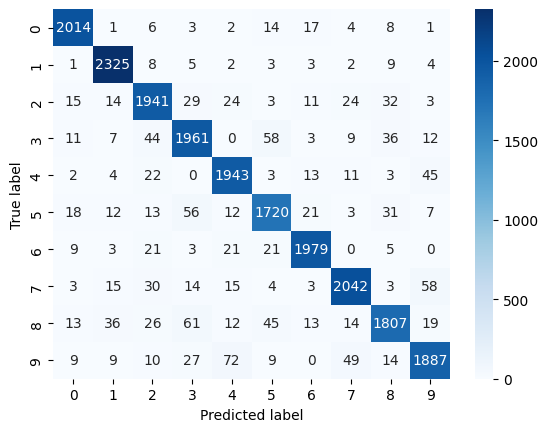

In [21]:
accuracy = metrics.accuracy_score(y_true = y_test, y_pred=y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Plot the confusion matrix using Seaborn's heatmap function
sns.heatmap(conf_mat, cmap="Blues", annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [22]:
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

Accuracy: 0.9758921339749392


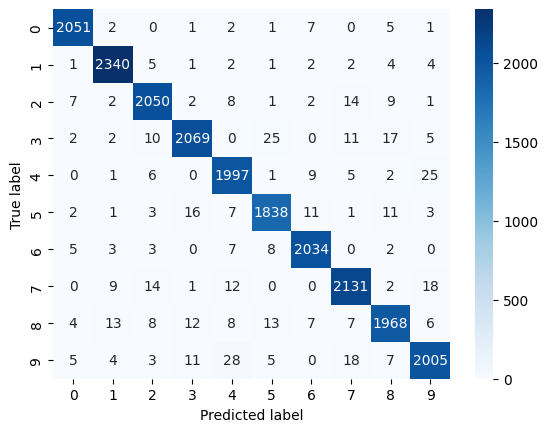

In [23]:
# plot for non linear model
accuracy = metrics.accuracy_score(y_true = y_test, y_pred=y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Plot the confusion matrix using Seaborn's heatmap function
sns.heatmap(conf_mat, cmap="Blues", annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Q3
Use PCA from sklearn.decomposition to reduce dimensionality of feature space.
reduce to 256 features
and then train and do evaluation

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=256)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_linear_reduced = SVC(kernel='linear')
model_linear_reduced.fit(X_train_pca, y_train)

y_pred = model_linear_reduced.predict(X_test_pca)

Accuracy: 0.9383780180008572


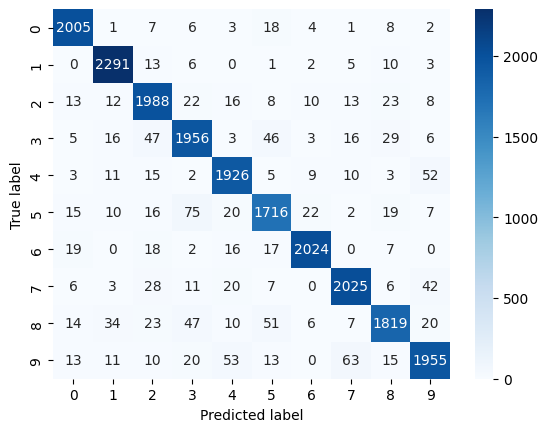

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Plot the confusion matrix using Seaborn's heatmap function
sns.heatmap(conf_mat, cmap="Blues", annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()